# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


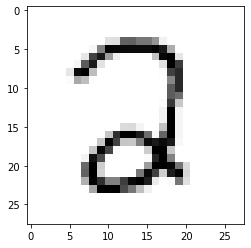

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2225195851019431
train accuracy is: 0.7622266733433484, test accuracy is 0.7479838709677419


Epoch 10 Loss 0.06845190078879143
train accuracy is: 0.9312301786012351, test accuracy is 0.9430443548387096


Epoch 20 Loss 0.04642373832558463
train accuracy is: 0.9502587214154565, test accuracy is 0.9576612903225806


Epoch 30 Loss 0.03841639263315883
train accuracy is: 0.957352695710232, test accuracy is 0.9652217741935484


Epoch 40 Loss 0.03413339435651386
train accuracy is: 0.9606075780337172, test accuracy is 0.967741935483871


Epoch 50 Loss 0.03132570936200716
train accuracy is: 0.9641962944416625, test accuracy is 0.96875


Epoch 60 Loss 0.0292592918700543
train accuracy is: 0.9670338841595727, test accuracy is 0.969758064516129


Epoch 70 Loss 0.027640317626719018
train accuracy is: 0.9687865131029878, test accuracy is 0.96875


Epoch 80 Loss 0.02630527912996113
train accuracy is: 0.9701218494408279, test accuracy is 0.9682459677419355


Epoch 90 Loss 0.025175891237257563
train accuracy is: 0.971957936905358, test accuracy is 0.96875


Epoch 100 Loss 0.0242210170009837
train accuracy is: 0.9727925221165081, test accuracy is 0.969758064516129


Epoch 110 Loss 0.023361809404093933
train accuracy is: 0.9739609414121182, test accuracy is 0.9702620967741935


Epoch 120 Loss 0.02258506958384938
train accuracy is: 0.9749624436654982, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.021875625370652265
train accuracy is: 0.9763812385244534, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.021231020459077744
train accuracy is: 0.9768819896511434, test accuracy is 0.9722782258064516


Epoch 150 Loss 0.02063189318196041
train accuracy is: 0.9775496578200634, test accuracy is 0.9717741935483871


Epoch 160 Loss 0.02008304225996461
train accuracy is: 0.9780504089467534, test accuracy is 0.9727822580645161


Epoch 170 Loss 0.01956870993729334
train accuracy is: 0.9783842430312135, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.019086579381559134
train accuracy is: 0.9788849941579035, test accuracy is 0.9737903225806451


Epoch 190 Loss 0.018630248600356055
train accuracy is: 0.9793022867634785, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.018188922491478892
train accuracy is: 0.9793857452845935, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.01777766654796162
train accuracy is: 0.9801368719746286, test accuracy is 0.9747983870967742


Epoch 220 Loss 0.017375345751833284
train accuracy is: 0.9806376231013186, test accuracy is 0.9763104838709677


Epoch 230 Loss 0.016988863480070716
train accuracy is: 0.9810549157068936, test accuracy is 0.9773185483870968


Epoch 240 Loss 0.016615922590164964
train accuracy is: 0.9815556668335838, test accuracy is 0.9773185483870968


0.0047893053947365045

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.21712555935796898
train accuracy is: 0.7887664830579202, test accuracy is 0.7993951612903226


Epoch 10 Loss 0.09977632390731891
train accuracy is: 0.913536972124854, test accuracy is 0.9203629032258065


Epoch 20 Loss 0.07825789787717216
train accuracy is: 0.9292271740944751, test accuracy is 0.9359879032258065


Epoch 30 Loss 0.06787802037986716
train accuracy is: 0.9365715239525956, test accuracy is 0.9430443548387096


Epoch 40 Loss 0.06149641249282163
train accuracy is: 0.9406609914872308, test accuracy is 0.9480846774193549


Epoch 50 Loss 0.05708572157811863
train accuracy is: 0.9445000834585211, test accuracy is 0.9511088709677419


Epoch 60 Loss 0.053815983544351374
train accuracy is: 0.9480887998664663, test accuracy is 0.9536290322580645


Epoch 70 Loss 0.051274576481500696
train accuracy is: 0.9496745117676515, test accuracy is 0.9561491935483871


Epoch 80 Loss 0.04923017224264372
train accuracy is: 0.9509263895843766, test accuracy is 0.9581653225806451


Epoch 90 Loss 0.047539663562310125
train accuracy is: 0.9516775162744117, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04611189488939101
train accuracy is: 0.9531797696544817, test accuracy is 0.9606854838709677


Epoch 110 Loss 0.04488659273292483
train accuracy is: 0.9541812719078618, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04381966674160764
train accuracy is: 0.9550993156401268, test accuracy is 0.9627016129032258


Epoch 130 Loss 0.04287879326801963
train accuracy is: 0.9557669838090469, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.04204235975926096
train accuracy is: 0.9567684860624269, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04129143295484636
train accuracy is: 0.957102320146887, test accuracy is 0.9637096774193549


Epoch 160 Loss 0.040612849768371054
train accuracy is: 0.9577699883158071, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.039995046574584275
train accuracy is: 0.9585211150058421, test accuracy is 0.9637096774193549


Epoch 180 Loss 0.03942975208369755
train accuracy is: 0.9590218661325322, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.038910664371270776
train accuracy is: 0.9592722416958771, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.0384300908559496
train accuracy is: 0.9602737439492572, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.037984880491528
train accuracy is: 0.9603572024703723, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.03756916459815519
train accuracy is: 0.9606910365548322, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03718133056749443
train accuracy is: 0.9609414121181773, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03681773035521731
train accuracy is: 0.9610248706392923, test accuracy is 0.9667338709677419


0.014854320763113

### Comparing results of NN and LR

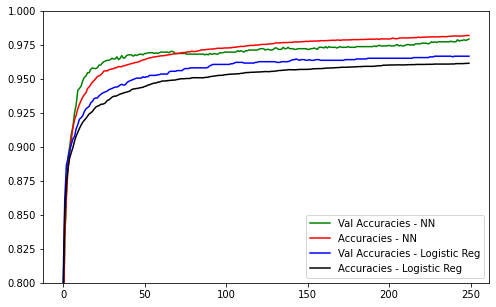

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

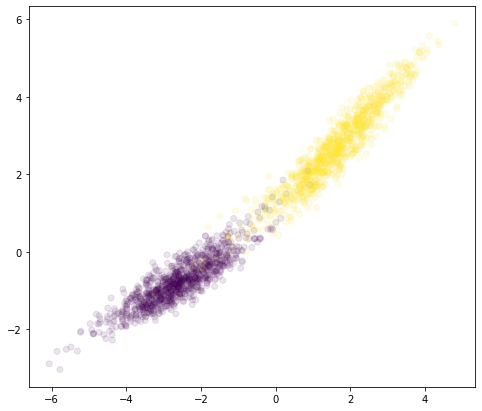

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

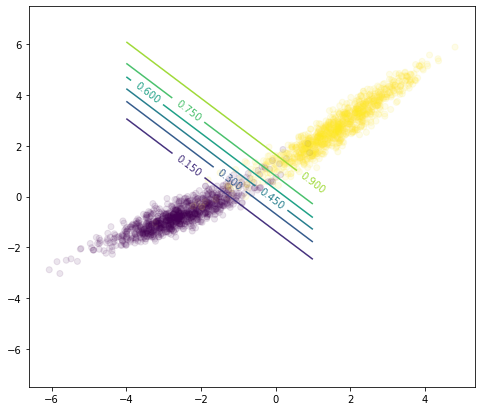

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );